Problem Statement: Diabetes has been on the rise  lately both in teenagers, adult and older citizens. An early detection is very important for getting necessary treatment and preventing further damages.

Project Goal:

1) To explore the relationship between gender, symptoms and diabetic and non-diabetic patients.

2) To build a predictive models to detect whether an individual is diabetic or not through the symptoms they have.

3) Evaluate the performance of different model built and choose the best performing model for the prediction.






In [5]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [7]:
#Import the necessary libraries
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")

In [9]:
#Get a glance of the data
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [10]:
#Get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [11]:
#Capitalize first letter of the column header
data = data.rename(columns={"delayed healing":"Delayed Healing", 'visual blurring':"Visual Blurring", 'Sudden weight Loss':'Sudden Weight Loss', 'weakness':"Weakness", 'partial paresis':"Partial Paresis", "class":"Class", 'muscle stiffness':'Muscle Stiffness'})


In [12]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'Weakness', 'Polyphagia', 'Genital thrush', 'Visual Blurring',
       'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis',
       'Muscle Stiffness', 'Alopecia', 'Obesity', 'Class'],
      dtype='object')

Exploratory Data Analysis (EDA) Questions:

1) How many male and female patients were recorded?  
2) How many of them were diabetic and otherwise?  
3) What is the percentage of diabetic male and female in reference to the number of patients?  
4) What are the common symptoms in male and female patients?   
5) What is the earliest age for male or female patients to have daibetics?  
6) What are the symptoms that are common in both gender?  
7) What symptoms are not common in the genders  



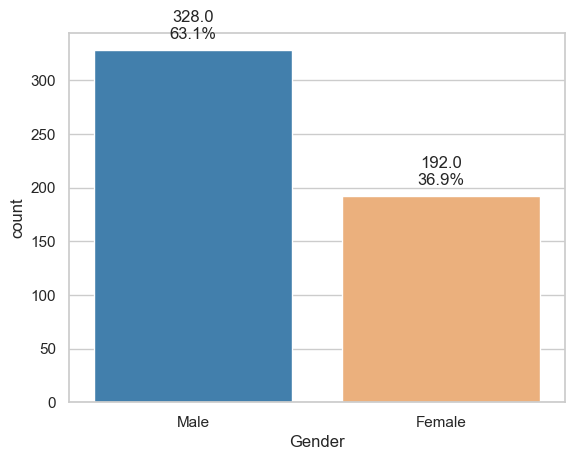

In [13]:
#1 Percentage of male and female in the dataset

sns.set(style='whitegrid')  # Set a white grid background for better readability

gender_plot = sns.countplot(x='Gender', data=data, palette=['#3182bd', '#fdae6b'])

# Annotate each bar with the percentage value...
total = len(data['Gender'])
for patch in gender_plot.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height() / total) # Calculate the percentage to one significant number
    count = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2 # Place the text at the center of the bar/patch
    y = patch.get_height() + 0.02 * total  # Adjust the vertical position of the text
    gender_plot.text(x, y, f'{count}\n{percentage}', ha='center')
plt.show()

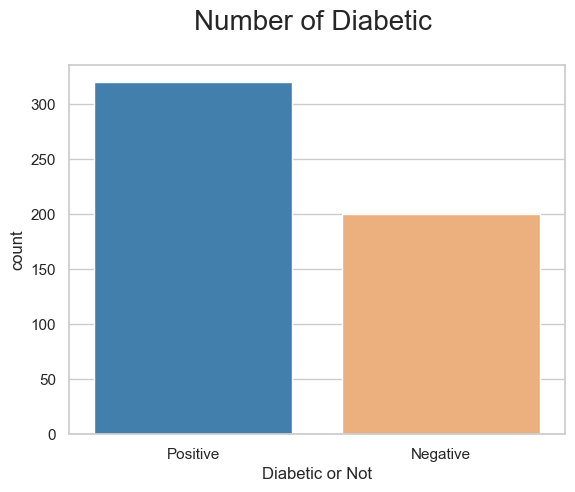

   Category  Count  Percentage
0  Positive    320   61.538462
1  Negative    200   38.461538


In [14]:
#2 Percentage of diabetic

sns.set(style='whitegrid')  # Set a white grid background for better readability

class_plot = sns.countplot(x='Class', data=data, palette=['#3182bd', '#fdae6b'])
# Set plot labels and title
plt.title('Number of Diabetic ', fontsize= 20, pad=25)
plt.xlabel('Diabetic or Not')

plt.show()



#create pandas series
data_series =  pd.Series( data['Class'])

# Use value_counts() to count occurrences
value_counts = data_series.value_counts()


# Create a DataFrame
df_counts = pd.DataFrame(value_counts).reset_index()
df_counts.columns = ['Category', 'Count']

# Calculate percentages
total_count = df_counts['Count'].sum()
df_counts['Percentage'] = (df_counts['Count'] / total_count) * 100

# Display the result
print(df_counts)



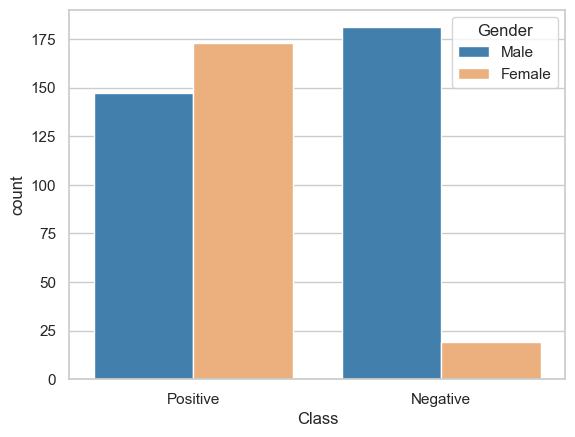

Gender    Female  Male  Total
Class                        
Negative      19   181    200
Positive     173   147    320
Total        192   328    520


In [15]:
#3 Number of Male and female that has diabeties


sns.set(style='whitegrid')  # Set a white grid background for better readability


# Create a DataFrame
df = pd.DataFrame(data)

# Create a count plot
diabetic_plot = sns.countplot(x='Class', hue='Gender', data=df, palette=['#3182bd', '#fdae6b'])

# Show the count values in a table
table = pd.crosstab(index=df['Class'], columns=df['Gender'], margins=True, margins_name='Total')

# Display the count plot
plt.show()

# Display the table
print(table)


*Ponder: The percentage of female patients were almost twice of the male. Could it be the reasonn we have more positive females than male? What woukld have happened if we have the same number of observations? Would it still be the same?*





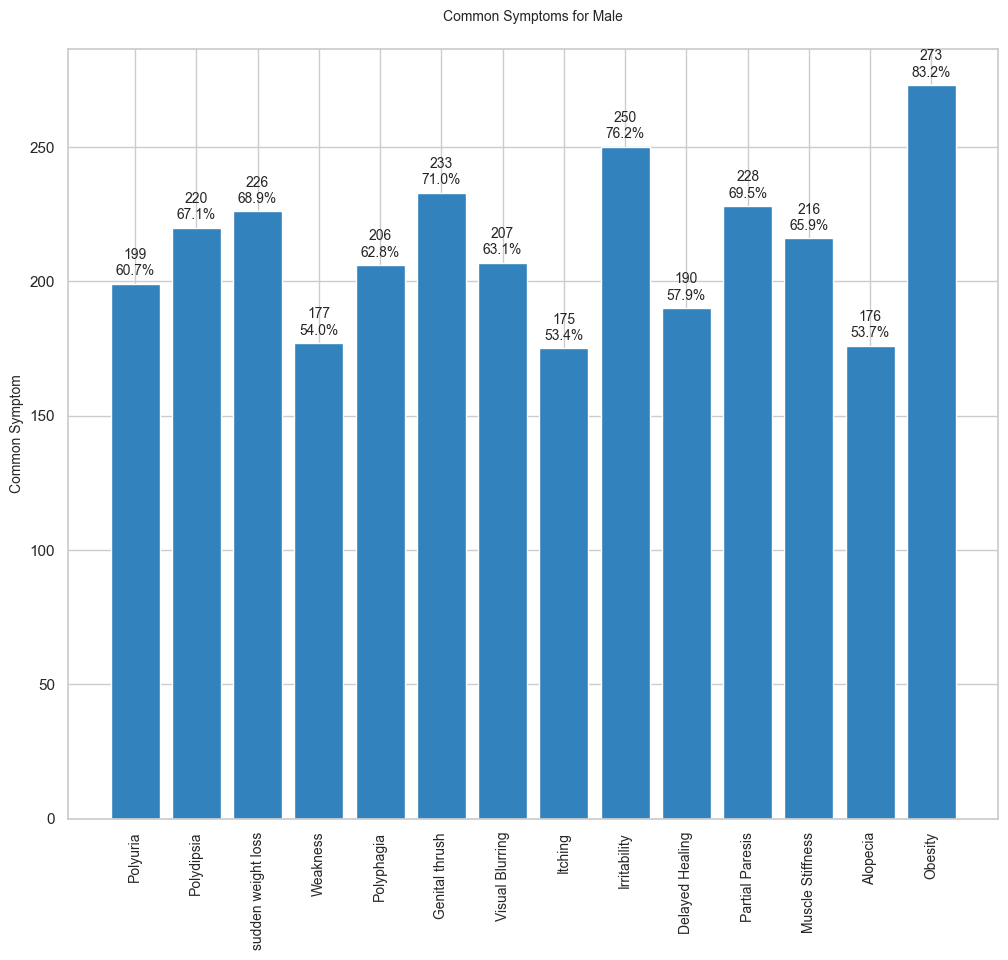

In [35]:
#4 Common Symptoms in male and female

# Identify Common Symptoms for Males
male_data = data[data['Gender'] == 'Male'] #create a new dataframe that contains only male rows
common_male_symptoms = male_data.drop(["Gender", "Age", "Class"], axis=1).apply(lambda column: column.value_counts().max()) #Drop the age, class and gender columns since they are not part of the symptoms we are trying to explore


common_male_symptoms_df = pd.DataFrame({
    'Symptoms': common_male_symptoms.index,
    'Common Symptoms_Count': common_male_symptoms.values
})




sns.set(style='whitegrid')  # Set a white grid background for better readability
# Plot the common symptoms
plt.figure(figsize=(12, 10))
symptom_plot = plt.bar(common_male_symptoms_df['Symptoms'], common_male_symptoms_df['Common Symptoms_Count'], color=['#3182bd'])
plt.title('Common Symptoms for Male', fontsize=10, pad=20)
plt.ylabel('Common Symptom', fontsize=10)
plt.xticks(rotation=90, fontsize=10)


#Display the percentage count
total = len(male_data)
for bar in symptom_plot:
    percentage = '{:.1f}%'.format(100 * (bar.get_height() / total)) # Calculate the percentage to one significant figure
    count = bar.get_height()
    x = bar.get_x() + bar.get_width() /2 # Place the text at the center of the bar/patch
    y =  bar.get_height() +  0.01 *total  # Adjust the vertical position of the text
    plt.text(x, y, f'{count}\n{percentage}', ha='center', fontsize=10)


plt.show()







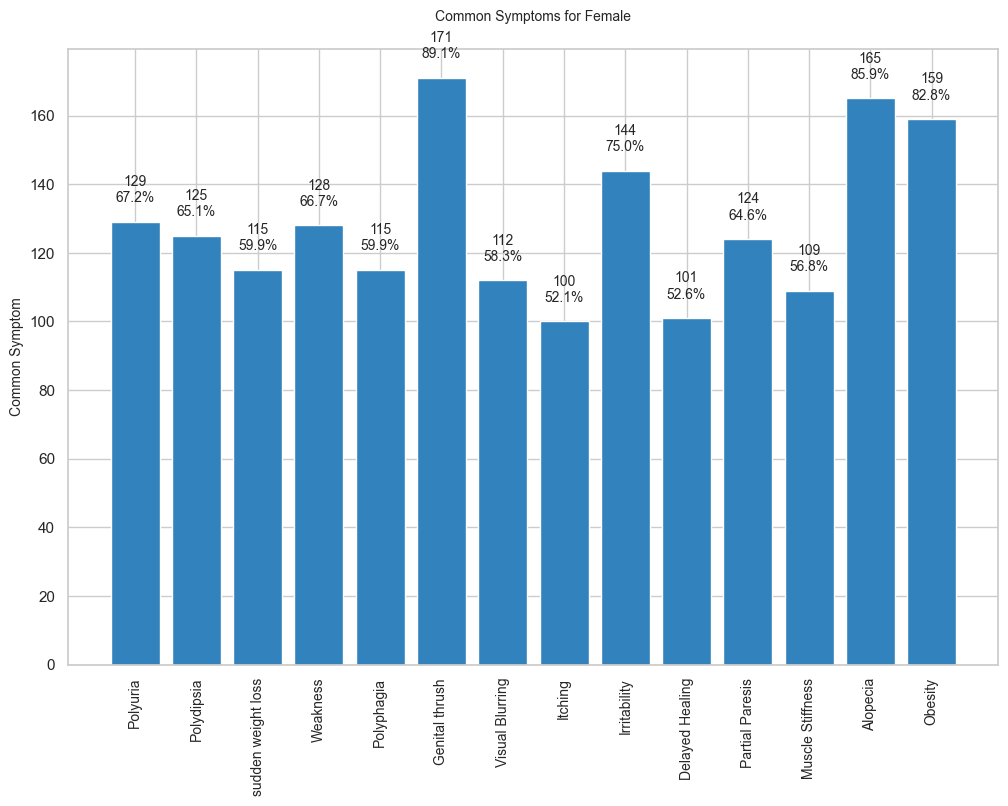

In [30]:
#Percentage of Symptoms in female



# Identify Common Symptoms for Males
female_data = data[data['Gender'] == 'Female']
common_female_symptoms = female_data.drop(["Gender", "Age", "Class"], axis=1).apply(lambda x: x.value_counts().max())


common_female_symptoms_df = pd.DataFrame({
    'Symptoms': common_female_symptoms.index,
    'Common Symptoms_Count': common_female_symptoms.values
})


sns.set(style='whitegrid')  # Set a white grid background for better readability
# Plot the common symptoms
plt.figure(figsize=(12, 8))
symptom_plot = plt.bar(common_female_symptoms_df['Symptoms'], common_female_symptoms_df['Common Symptoms_Count'], color=['#3182bd'])
plt.title('Common Symptoms for Female', fontsize=10, pad=20)
plt.ylabel('Common Symptom', fontsize=10)
plt.xticks(rotation=90, fontsize=10)


#Display the percentage count
total = len(female_data)
for bar in symptom_plot:
    percentage = '{:.1f}%'.format(100 * (bar.get_height() / total)) # Calculate the percentage to one significant figure
    count = bar.get_height()
    x = bar.get_x() + bar.get_width()/2  # Place the text at the center of the bar/patch
    y =  bar.get_height() +  0.03 *total  # Adjust the vertical position of the text
    plt.text(x, y, f'{count}\n{percentage}', ha='center', fontsize=10)




# Show the plot
plt.show()

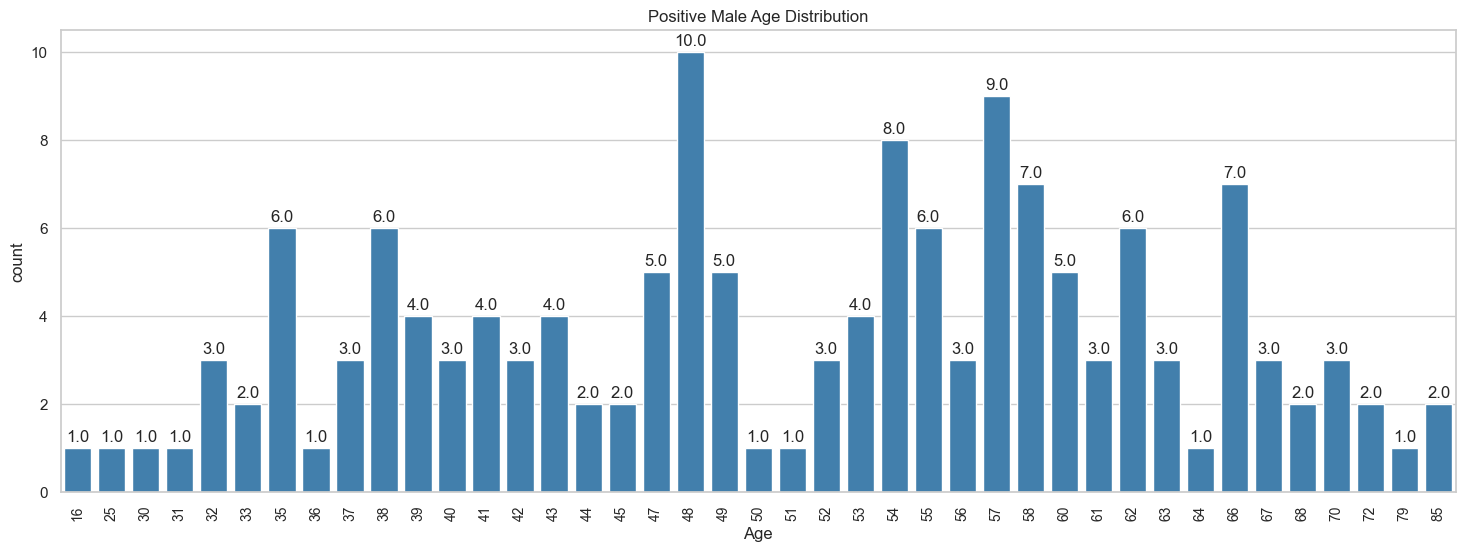

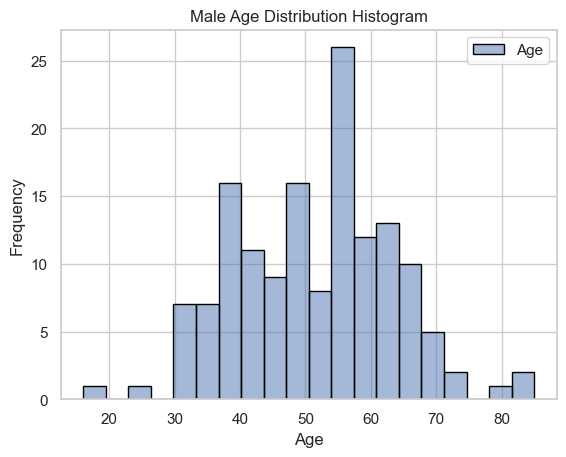

In [18]:
#Age Distribution Male
sns.set(style='whitegrid')  # Set a white grid background for better readability


male_age_data = data[(data['Gender'] == 'Male') & (data['Class'] == 'Positive')]

male_age = male_age_data.drop(['Polyuria', 'Polydipsia', 'sudden weight loss',
       'Weakness', 'Polyphagia', 'Genital thrush', 'Visual Blurring',
       'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis',
       'Muscle Stiffness', 'Alopecia', 'Obesity'], axis=1)

plt.figure(figsize=(18, 6)) #Set the size of the plot
age_plot = sns.countplot(x='Age', data=male_age, palette=[ '#3182bd']) #Create the seaborn plot

#display the figure
total = len(male_age['Age'])
for bar in age_plot.patches:

    count = bar.get_height()
    x =bar.get_x() + bar.get_width() / 2 # Place the text at the center of the bar/patch
    y = bar.get_height() + 0.001 * total  # Adjust the vertical position of the text
    age_plot.text(x, y, f'{count}', ha='center')



plt.title('Positive Male Age Distribution')
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Create a histogram using Seaborn
sns.histplot(male_age, bins=20, kde=False, color='#3182bd', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Male Age Distribution Histogram')

# Show the plot
plt.show()






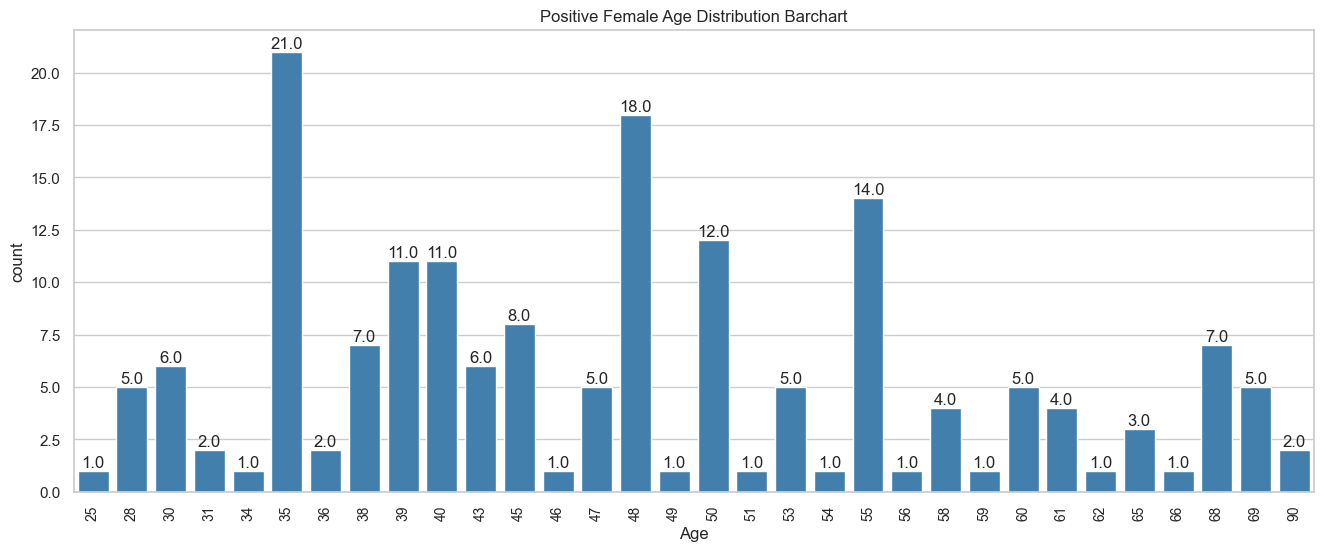

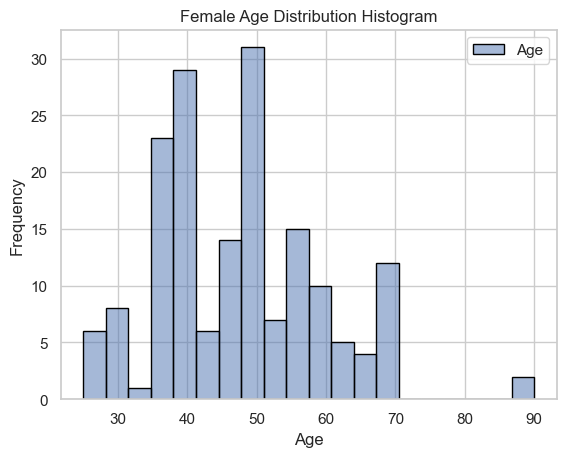

In [19]:
#Age distribution female

sns.set(style='whitegrid')  # Set a white grid background for better readability


female_age_data = data[(data['Gender'] == 'Female') & (data['Class'] == 'Positive')]

female_age = female_age_data.drop(['Polyuria', 'Polydipsia', 'sudden weight loss',
       'Weakness', 'Polyphagia', 'Genital thrush', 'Visual Blurring',
       'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis',
       'Muscle Stiffness', 'Alopecia', 'Obesity'], axis=1)

plt.figure(figsize=(16, 6)) #Set the size of the plot
agef_plot = sns.countplot(x='Age', data=female_age, palette=[ '#3182bd']) #Create the seaborn plot


#display the figure
total = len(female_age['Age'])
for bar in agef_plot.patches:

    count = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2 # Place the text at the center of the bar/patch
    y = bar.get_height() + 0.001 * total  # Adjust the vertical position of the text
    agef_plot.text(x, y, f'{count}', ha='center')


plt.title('Positive Female Age Distribution Barchart')
plt.xticks(rotation=90, fontsize=10)
plt.show()


# Create a histogram using Seaborn
sns.histplot(female_age, bins=20, kde=False, color='#3182bd', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Female Age Distribution Histogram')

# Show the plot
plt.show()




